In [78]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.mllib.linalg.distributed import RowMatrix,CoordinateMatrix
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import broadcast, col, array, udf
from pyspark.sql import functions as F, SQLContext
import numpy as np
from operator import mul
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyspark import SparkConf, SparkContext
sc = SparkContext(conf=SparkConf().setAppName("MyApp").setMaster("local[2]"))

In [3]:
sqlContext = SQLContext(sc)

In [4]:
spark = SparkSession.builder.appName("tSalesItem").enableHiveSupport().getOrCreate()

In [5]:
movies = spark.read.csv('movies.csv',header=True)
actors = spark.read.csv('movie_actors.csv',header=True)
countries = spark.read.csv('movie_countries.csv',header=True)
directors = spark.read.csv('movie_directors.csv',header=True)
genres = spark.read.csv('movie_genres.csv',header=True)
ratings = spark.read.csv('user_ratedmovies-timestamps.csv',header=True)

In [99]:
movies = movies.withColumn("rtAllCriticsNumReviews", movies["rtAllCriticsNumReviews"].cast(IntegerType()))
movies = movies.withColumn("rtAudienceNumRatings", movies["rtAudienceNumRatings"].cast(IntegerType()))
movies = movies.withColumn("rtAudienceRating", movies["rtAudienceRating"].cast(DoubleType()))
movies = movies.withColumn("rtAllCriticsRating", movies["rtAllCriticsRating"].cast(DoubleType()))
movies = movies.withColumn("rtTopCriticsRating", movies["rtTopCriticsRating"].cast(DoubleType()))




In [33]:
numOFReviews = movies.groupby(movies.rtAllCriticsNumReviews).count().toPandas()

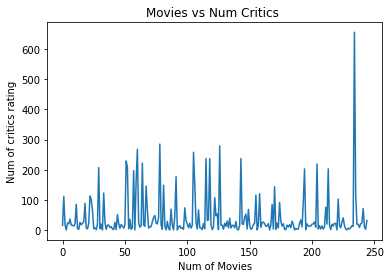

In [47]:
plt.plot(numOFReviews['count'])
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Num of Movies')
plt.ylabel('Num of critics rating')
plt.title("Movies vs Num Critics ")
plt.show()

In [36]:
numOFReview_aud = movies.groupby(movies.rtAudienceNumRatings).count().toPandas()

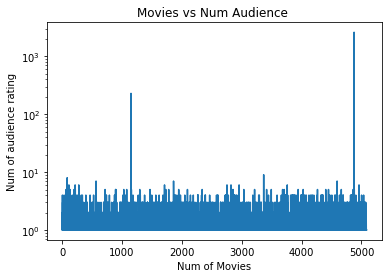

In [48]:
#movies on x
plt.plot(numOFReview_aud['count'])
plt.yscale('log')
plt.xlabel('Num of Movies')
plt.ylabel('Num of audience rating')
plt.title("Movies vs Num Audience ")
#plt.xscale('log')

plt.show()

In [67]:
moviesPerCountry = countries.groupby(countries.country).count().filter(countries.country.isNotNull()).toPandas()

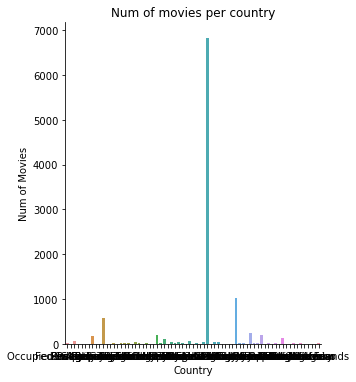

In [83]:
ax = sns.catplot(x="country", y="count", kind="bar", data=moviesPerCountry)
ax.set(xlabel='Country', ylabel='Num of Movies', title = 'Num of movies per country')

In [84]:
moviesPerDirector = directors.groupby(directors.directorID).count().filter(directors.directorID.isNotNull()).toPandas()

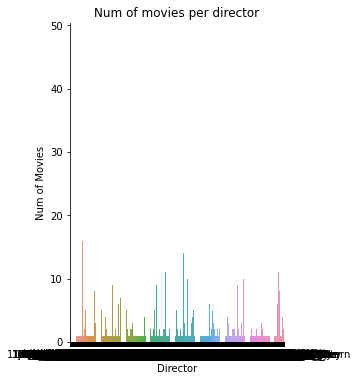

In [87]:
ax = sns.catplot(x="directorID", y="count", kind="bar", data=moviesPerDirector)
ax.set(xlabel='Director', ylabel='Num of Movies', title = 'Num of movies per director')

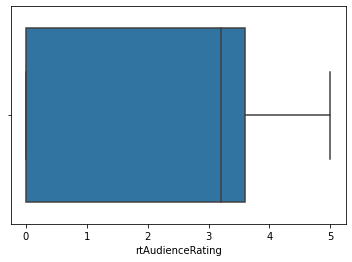

In [101]:
movies_p = movies.toPandas()
ax = sns.boxplot(x=movies_p["rtAudienceRating"])


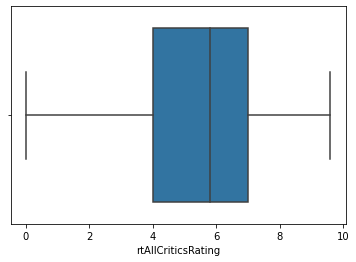

In [102]:
ax = sns.boxplot(x=movies_p["rtAllCriticsRating"])

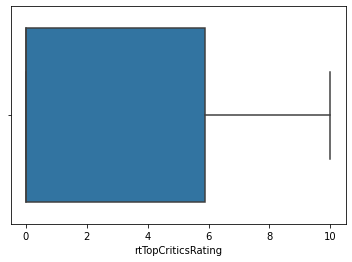

In [103]:
ax = sns.boxplot(x=movies_p["rtTopCriticsRating"])

In [95]:
genresOfMovies = genres.groupby(genres.genre).count().toPandas()

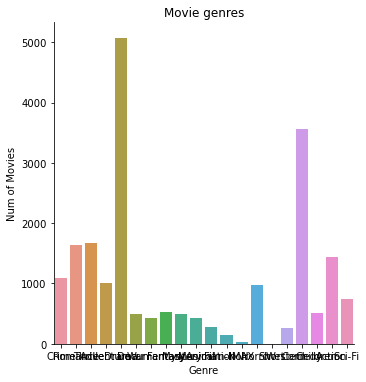

In [96]:
ax = sns.catplot(x="genre", y="count", kind="bar", data=genresOfMovies)
ax.set(xlabel='Genre', ylabel='Num of Movies', title = 'Movie genres')

In [106]:
moviesPerYear = movies.groupby(movies.year).count().toPandas()

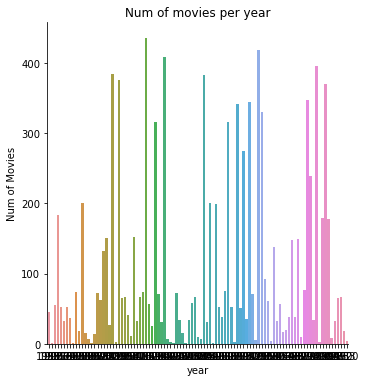

In [107]:
ax = sns.catplot(x="year", y="count", kind="bar", data=moviesPerYear)
ax.set(xlabel='year', ylabel='Num of Movies', title = 'Num of movies per year')